In [1]:
import pandas as pd
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# df = pd.read_excel('tree_data_0406.xlsx')
# sectors = ['Healthcare', 'Basic Materials', 'Consumer Defensive',
#        'Industrials', 'Financial Services', 'Technology',
#        'Consumer Cyclical', 'Real Estate', 'Energy', 'Utilities',
#        'Communication Services']
# df = df.loc[df['Sector'].isin(sectors)]

In [3]:
# df.info()

In [4]:
data = pd.read_excel("/Users/yzq/Desktop/2020spring/DMI/week_11/tree_data_0410.xlsx")

In [5]:
sectors = ['Healthcare', 'Basic Materials', 'Consumer Defensive',
       'Industrials', 'Financial Services', 'Technology',
       'Consumer Cyclical', 'Real Estate', 'Energy', 'Utilities',
       'Communication Services']

data = data.loc[data['Sector'].isin(sectors)]


In [6]:
data = data.dropna()

In [21]:
data[data['margin_change_95']<0]

,margin_change_70,margin_change_75,margin_change_80,margin_change_85,margin_change_50,margin_change_90,margin_change_95,ticker,Name,page_size_bytes,...,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology
4205,-0.216989,-0.216989,-0.216989,-0.216989,-0.216989,-0.216989,-0.216989,SGA,SAGA COMMUNICATIONS,3.19458,...,0,1,0,0,0,0,0,0,0,0


In [23]:
data = data.drop(4205,axis = 0)

In [24]:
data.describe()

,margin_change_70,margin_change_75,margin_change_80,margin_change_85,margin_change_50,margin_change_90,margin_change_95,Shares_Held_by_All_Insider,Shares_Held_by_Institutions,Float_Held_by_Institutions,...,Sector_Basic Materials,Sector_Communication Services,Sector_Consumer Cyclical,Sector_Consumer Defensive,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology
count,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,...,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000
mean,0.240947,0.201185,0.160847,0.120893,0.400763,0.081131,0.041178,0.132135,0.551086,0.615422,...,0.045524,0.045909,0.091625,0.037841,0.061083,0.237034,0.184979,0.111794,0.050903,0.114291
std,0.427647,0.400869,0.367364,0.325966,0.490054,0.272981,0.198607,0.183631,0.343398,0.351116,...,0.208471,0.209307,0.288524,0.190830,0.239506,0.425304,0.388318,0.315143,0.219820,0.318195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008000,0.217850,0.279525,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046500,0.582950,0.707850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.181500,0.883975,0.946500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.711411,0.986070,1.010510,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data['Sector'].unique()

array(['Healthcare', 'Basic Materials', 'Consumer Defensive',
       'Industrials', 'Financial Services', 'Technology',
       'Consumer Cyclical', 'Real Estate', 'Energy', 'Utilities',
       'Communication Services'], dtype=object)

In [9]:
data = pd.get_dummies(data, columns=['Sector'])
data = data.drop(['Sector_Utilities'], axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5207 entries, 0 to 5223
Data columns (total 62 columns):
margin_change_70                         5207 non-null float64
margin_change_75                         5207 non-null float64
margin_change_80                         5207 non-null float64
margin_change_85                         5207 non-null float64
margin_change_50                         5207 non-null float64
margin_change_90                         5207 non-null float64
margin_change_95                         5207 non-null float64
ticker                                   5207 non-null object
Name                                     5207 non-null object
page_size_bytes                          5207 non-null object
latest_edit_year_-_2018                  5207 non-null object
avg_day_between_edits                    5207 non-null object
avg_edits_per_year                       5207 non-null object
num_edits_2018                           5207 non-null object
num_edits_2017    

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy.stats import ks_2samp

In [37]:
x_train = data.iloc[0:,9:]
y_train = data[['margin_change_80']]
x_train = x_train.astype(float)
y_train = y_train.astype(float)

In [62]:
# sample split
# train, test = train_test_split(data, test_size = 0.3)
# x_train = train.iloc[0:, 9:]
# x_train = x_train.astype(float)
# y_train = train[['margin_change_80']]
# y_train = y_train.astype(float)
# x_test = test.iloc[0:, 9:]
# x_test = x_test.astype(float)
# y_test = test[['margin_change_80']]
# y_test = y_test.astype(float)

In [13]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5207 entries, 0 to 5223
Data columns (total 53 columns):
page_size_bytes                          5207 non-null float64
latest_edit_year_-_2018                  5207 non-null float64
avg_day_between_edits                    5207 non-null float64
avg_edits_per_year                       5207 non-null float64
num_edits_2018                           5207 non-null float64
num_edits_2017                           5207 non-null float64
edits_change_2017_2018                   5207 non-null float64
pageviews_60d                            5207 non-null float64
num_sections                             5207 non-null float64
num_redir_links                          5207 non-null float64
num_references                           5207 non-null float64
Shares_Held_by_All_Insider               5207 non-null float64
Shares_Held_by_Institutions              5207 non-null float64
Float_Held_by_Institutions               5207 non-null float64
Number_of_I

In [41]:
# col = ['Shares_Held_by_Institutions','Sector_Financial Services','number_of_full-time_employee',
#        'Sector_Healthcare','Number_of_Institutions_Holding_Shares','Float_Held_by_Institutions','tech_score',
#        'comment','video_2018','Twitter','verified','num_edits_2017','page_size_bytes']

# col = ['Sector_Financial Services','Number_of_Institutions_Holding_Shares','Twitter',
#        'Sector_Healthcare','Float_Held_by_Institutions','number_of_full-time_employee',
#        'page_size_bytes','comment']

col = ['Sector_Financial Services', 'Number_of_Institutions_Holding_Shares', 'Sector_Healthcare', 'Twitter', 'Sector_Consumer Defensive']

x_train = x_train[col]
# x_test = x_test[col]
# y_train = y_train[col]
# y_test = y_test[col]

In [17]:
# fit and predict
model = LogisticRegression(class_weight="balanced")
model.fit(x_train, y_train)
predictions = model.predict(x_test)
actuals = np.array(y_test)

# get p value
# from sklearn.feature_selection import chi2
# scores, pvalues = chi2(x_train, y_train)
# pvalues


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
# accuracy
acc = model.score(x_test,actuals)
# gini
fpr, tpr, thresholds = roc_curve(actuals, predictions)
roc_auc = auc(fpr, tpr)
gini = (2 * roc_auc) - 1
if gini < 0:
    predictions = 1 - predictions
    fpr, tpr, thresholds = roc_curve(actuals, predictions)
    roc_auc = auc(fpr, tpr)
    gini = (2 * roc_auc) - 1
# ks statistic
ks = ks_2samp(actuals.ravel(), predictions)

0.5664961636828645
0.16979274071156336
0.30179028132992325


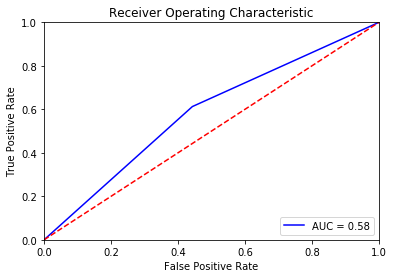

In [19]:
print(acc)
print(gini)
print(ks[0])
import sklearn
sklearn.metrics.confusion_matrix(actuals, predictions)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
import statsmodels.api as sm
sm_model = sm.Logit(y_train, sm.add_constant(x_train.astype(float))).fit(disp=0)
print(sm_model.pvalues)
sm_model.summary()


const                                    1.843450e-91
Sector_Financial Services                5.392773e-06
Number_of_Institutions_Holding_Shares    7.178077e-05
Sector_Healthcare                        1.232851e-03
Twitter                                  1.655371e-02
Sector_Consumer Defensive                4.497677e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       margin_change_80   No. Observations:                 5206
Model:                          Logit   Df Residuals:                     5200
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:                 0.01002
Time:                        03:40:38   Log-Likelihood:                -2272.9
converged:                       True   LL-Null:                       -2295.9
Covariance Type:            nonrobust   LLR p-value:                 8.989e-09
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4846      0.073    -20.282      0.000      -1.628      -1.341
Sector_Financial Services                -0.4545      0.100     -4.549      0.000      -0.650      -0.259
Number_of_Institutions_Holding_Shares    -0.0006      0.000     -3.970      0.000      -0.001      -0.000
Sector_Healthcare                        -0.3431      0.106     -3.231      0.001      -0.551      -0.135
Twitter                                   0.1873      0.078      2.396      0.017       0.034       0.340
Sector_Consumer Defensive                 0.3562      0.178      2.005      0.045       0.008       0.704
=========================================================================================================
"""

In [39]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]].astype(float)))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [40]:

result = stepwise_selection(x_train, y_train)

print('resulting features:')
print(result)

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  Sector_Financial Services      with p-value 0.000231224
Add  Number_of_Institutions_Holding_Shares with p-value 0.00133359
Add  Sector_Healthcare              with p-value 0.000507983
Add  Twitter                        with p-value 0.0204699
Add  Sector_Consumer Defensive      with p-value 0.0369567
resulting features:
['Sector_Financial Services', 'Number_of_Institutions_Holding_Shares', 'Sector_Healthcare', 'Twitter', 'Sector_Consumer Defensive']
